In [3]:
import SRC.EDA as EDA
%matplotlib inline

In [119]:
from  sklearn.cluster import SpectralClustering
spec = SpectralClustering(n_clusters=15,affinity='precomputed')

In [123]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=30000, centers=15, n_features=2,random_state=0)
print(X.shape)

(30000, 2)


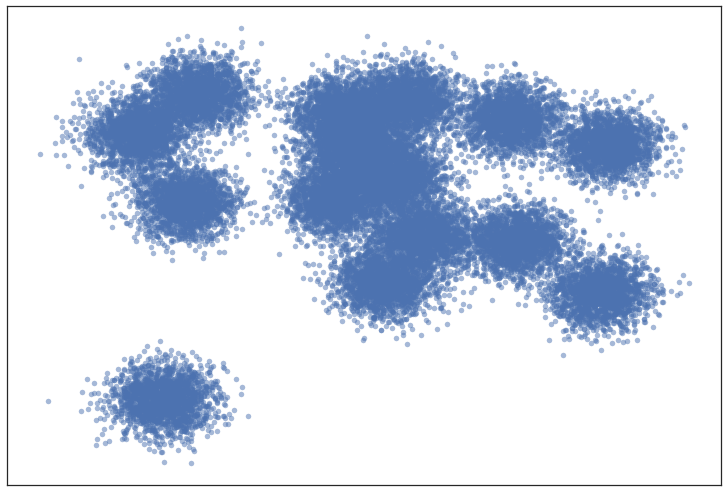

In [124]:
EDA.visualise_2D(X.T[0],X.T[1])

In [125]:
import os
import psutil
pid = os.getpid()
py = psutil.Process(pid)
memoryUse = py.memory_info()[0]/2.**30  # memory use in GB...I think
print('memory use:', memoryUse)

memory use: 0.18120956420898438


In [126]:

from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, n_neighbors=10,include_self=True)
affinity_matrix_2 = 0.5 * (connectivity + connectivity.T)
affinity_matrix_2

<30000x30000 sparse matrix of type '<class 'numpy.float64'>'
	with 343822 stored elements in Compressed Sparse Row format>

In [127]:

from sys import getsizeof
print(getsizeof(affinity_matrix_2))


56


In [128]:
labels = spec.fit_predict(affinity_matrix_2)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:229: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [129]:
import numpy as np
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

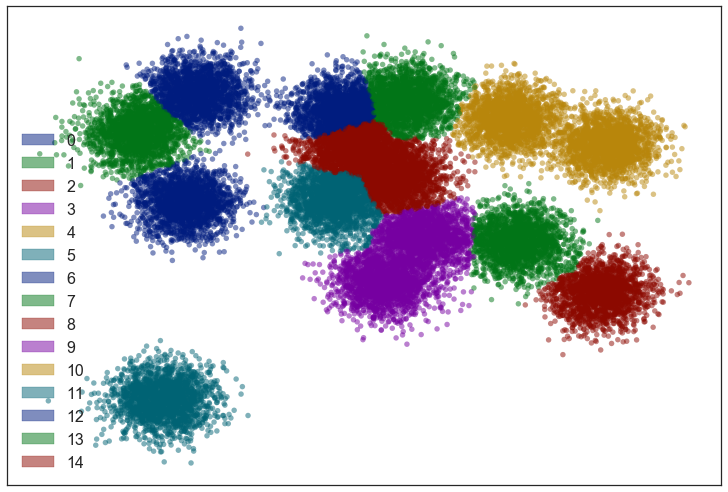

In [130]:
EDA.visualise_2D(X.T[0],X.T[1],labels)

In [109]:
del affinity_matrix_2
del spec
import gc 
gc.collect()


import os
import psutil
pid = os.getpid()
py = psutil.Process(pid)
memoryUse = py.memory_info()[0]/2.**30  # memory use in GB...I think
print('memory use:', memoryUse)

memory use: 0.16596603393554688
